## Importando librerías y data 

### Librerías 

In [66]:
# Manejo de datos
import pandas as pd 
import numpy as np

# Visualización e imagenes
import matplotlib.pyplot as plt
import seaborn as sns


# Otros
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

### Data

In [67]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

## Join data (train and test)

In [68]:
# Concatenando train y test 
data = pd.concat((train, test))
data = data.reset_index()

print(data[data['PassengerId'].duplicated()])

Ntrain = train['PassengerId']
Ntest = test['PassengerId']

print("Tamaoño data: {}".format(data.shape))
data.tail()

Empty DataFrame
Columns: [index, Age, Cabin, Embarked, Fare, Name, Parch, PassengerId, Pclass, Sex, SibSp, Survived, Ticket]
Index: []
Tamaoño data: (1309, 13)


,index,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1304,413,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1305,414,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
1306,415,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
1307,416,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309
1308,417,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,NaN,2668


## Inpección inicial de la data 

### Tipos de varibles y descripción de la data

In [69]:
data.dtypes

index            int64
Age            float64
Cabin           object
Embarked        object
Fare           float64
Name            object
Parch            int64
PassengerId      int64
Pclass           int64
Sex             object
SibSp            int64
Survived       float64
Ticket          object
dtype: object

In [70]:
data.select_dtypes('float').describe()

,Age,Fare,Survived
count,1046.000000,1308.000000,891.000000
mean,29.881138,33.295479,0.383838
std,14.413493,51.758668,0.486592
min,0.170000,0.000000,0.000000
25%,21.000000,7.895800,0.000000
50%,28.000000,14.454200,0.000000
75%,39.000000,31.275000,1.000000
max,80.000000,512.329200,1.000000


### Nulos en la data

In [71]:
data.isnull().sum()

index             0
Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

### Cabin

In [72]:
print('Numero de catigorías distintas',len(data['Cabin'].unique()))
data['Cabin'].value_counts().head(10)

Numero de catigorías distintas 187


C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
F2                 4
F33                4
F4                 4
C78                4
C22 C26            4
B96 B98            4
D                  4
Name: Cabin, dtype: int64

### Embarked

In [73]:
data['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

### Name 

In [74]:
print('Numero de catigorías distintas',len(data['Name'].unique()))
data['Name'].value_counts().head(10)

Numero de catigorías distintas 1307


Kelly, Mr. James                          2
Connolly, Miss. Kate                      2
Straus, Mrs. Isidor (Rosalie Ida Blun)    1
Taylor, Mr. Elmer Zebley                  1
Case, Mr. Howard Brown                    1
Clifford, Mr. George Quincy               1
Ross, Mr. John Hugo                       1
Robbins, Mr. Victor                       1
Franklin, Mr. Charles (Charles Fardon)    1
Lane, Mr. Patrick                         1
Name: Name, dtype: int64

### Ticket

In [75]:
print('Numero de catigorías distintas',len(data['Ticket'].unique()))
data['Ticket'].value_counts().head(5)

Numero de catigorías distintas 929


CA. 2343        11
1601             8
CA 2144          8
347077           7
S.O.C. 14879     7
Name: Ticket, dtype: int64

### Pclass

In [76]:
print('Numero de catigorías distintas',len(data['Pclass'].unique()))
data['Pclass'].value_counts().head(5)

Numero de catigorías distintas 3


3    709
1    323
2    277
Name: Pclass, dtype: int64

### Parch

In [77]:
print('Numero de catigorías distintas',len(data['Parch'].unique()))
data['Parch'].value_counts().head(5)

Numero de catigorías distintas 8


0    1002
1     170
2     113
3       8
5       6
Name: Parch, dtype: int64

### SibSp

In [78]:
print('Numero de catigorías distintas',len(data['SibSp'].unique()))
data['SibSp'].value_counts().head(5)

Numero de catigorías distintas 7


0    891
1    319
2     42
4     22
3     20
Name: SibSp, dtype: int64

## Exploración visual de los datos 

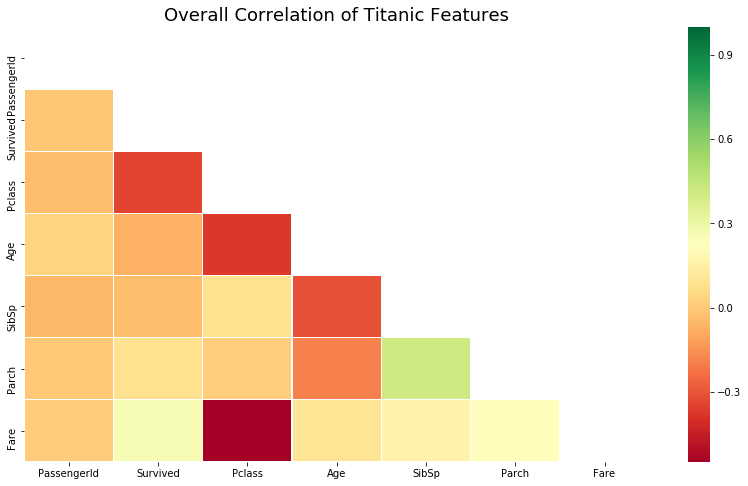

In [79]:
# inicializamos correlación
corr = train.corr()
# Configuramos Mascara
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Tamaño figura
plt.figure(figsize=(14, 8))
# Titulo
plt.title('Overall Correlation of Titanic Features', fontsize=18)
# Correlation matrix
sns.heatmap(corr, mask=mask, annot=False,cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
plt.show()

### Survived

0    549
1    342
Name: Survived, dtype: int64


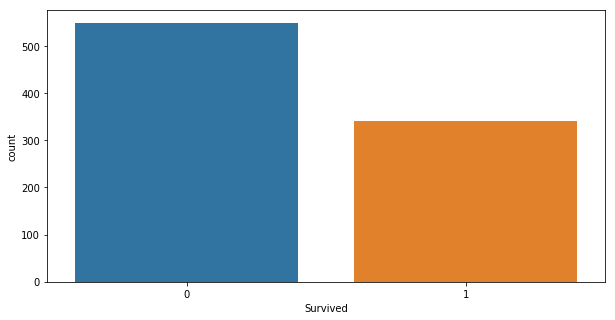

In [80]:
plt.figure(figsize = (10,5))
sns.countplot(x='Survived', data = train)
print(train['Survived'].value_counts())

### Age

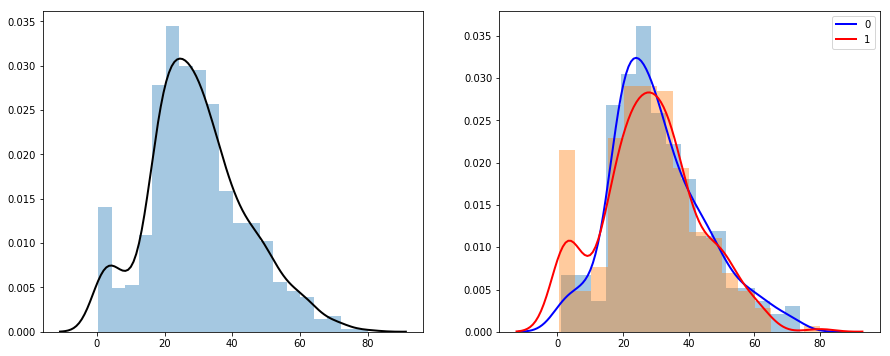

In [81]:
mask1 = [x==1 for x in train['Survived']]
mask0 = [x==0 for x in train['Survived']]

plt.figure(figsize = (15,13))
plt.subplot(2,2,1)
sns.distplot(train[['Age']].dropna(),kde_kws={"color": "k", "lw": 2})

plt.subplot(2,2,2)
sns.distplot(train[['Age']][mask0].dropna(), kde_kws={"color": "b", "lw": 2, "label": "0"})
sns.distplot(train[['Age']][mask1].dropna(), kde_kws={"color": "r", "lw": 2, "label": "1"})

### sex

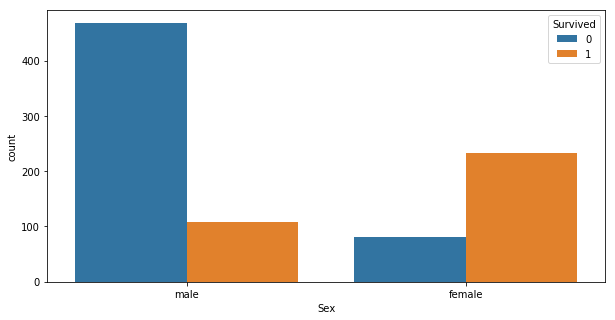

In [82]:
plt.figure(figsize=(10,5))
sns.countplot(x=train['Sex'],hue=train['Survived'])

### Embarked

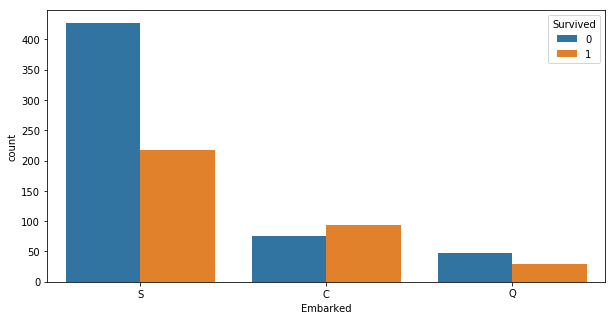

In [83]:
plt.figure(figsize=(10,5))
sns.countplot(x=train['Embarked'],hue=train['Survived'])

### Pclass

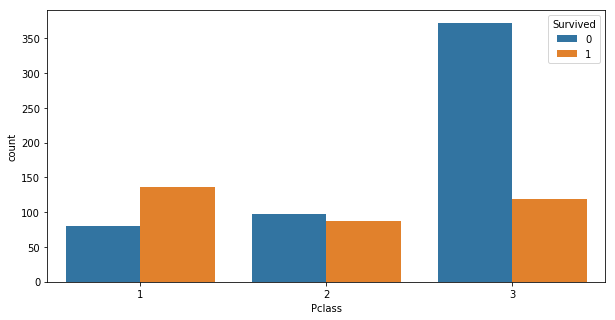

In [84]:
plt.figure(figsize=(10,5))
sns.countplot(x=train['Pclass'],hue=train['Survived'])

### Parch

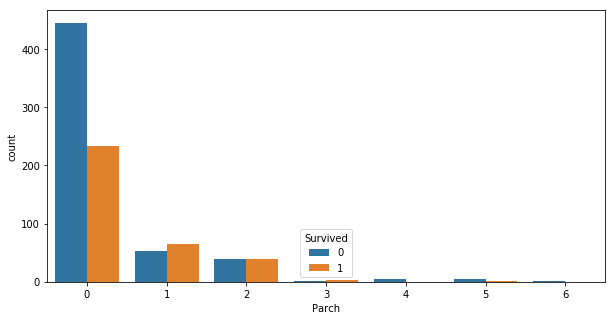

In [85]:
plt.figure(figsize=(10,5))
sns.countplot(x=train['Parch'],hue=train['Survived'])

### SibSp 

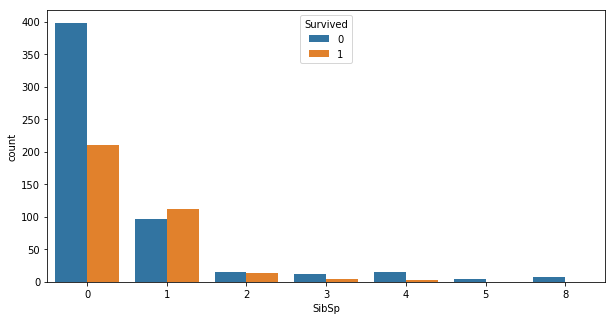

In [86]:
plt.figure(figsize=(10,5))
sns.countplot(x=train['SibSp'],hue=train['Survived'])

### Fare

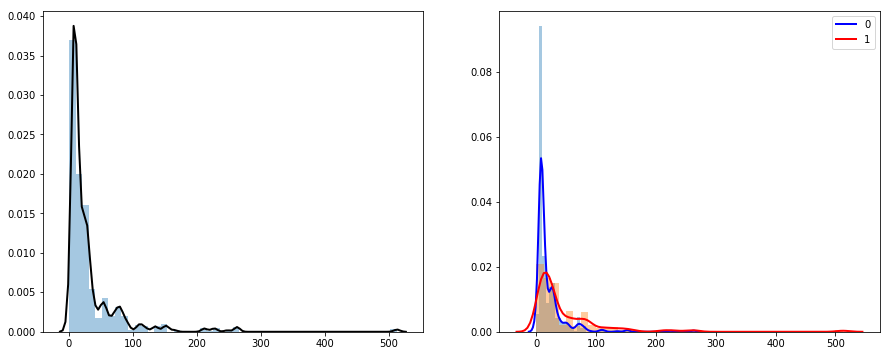

In [87]:
mask1 = [x==1 for x in train['Survived']]
mask0 = [x==0 for x in train['Survived']]

plt.figure(figsize = (15,13))
plt.subplot(2,2,1)
sns.distplot(train[['Fare']].dropna(),kde_kws={"color": "k", "lw": 2})

plt.subplot(2,2,2)
sns.distplot(train[['Fare']][mask0].dropna(), kde_kws={"color": "b", "lw": 2, "label": "0"})
sns.distplot(train[['Fare']][mask1].dropna(), kde_kws={"color": "r", "lw": 2, "label": "1"})

## Ingeniería de Variables

### Cabin

Numero de catigorías distintas 9
no_valor    1014
C             94
B             65
D             46
E             41
A             22
F             21
G              5
T              1
Name: Cabin_encodig, dtype: int64


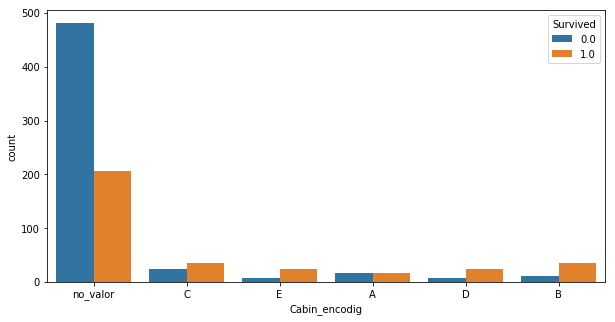

In [88]:
data['Cabin_encodig'] = data['Cabin'].str[0]
data['Cabin_encodig'].fillna('no_valor', inplace=True)

print('Numero de catigorías distintas',len(data['Cabin_encodig'].unique()))
print(data['Cabin_encodig'].value_counts().head(10))

data['Cabin_encodig'].replace(['F', 'G', 'T'],'A', inplace= True)

plt.figure(figsize=(10,5))
sns.countplot(x=data['Cabin_encodig'],hue=data['Survived'])


### Name

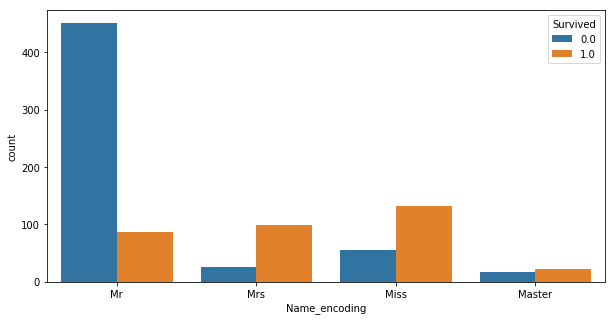

In [89]:
data['Name_encoding'] = data['Name'].apply(lambda x: str.split(x,',')[1].split('.')[0].strip())

def recodifique_name(x):
    if x in ['Lady','Dona','the Countess','Mme','Mlle','Ms']:
        return 'Miss'
    elif x in ['Don','Jonkheer','Sir','Capt','Major','Col','Rev','Dr']:
        return 'Mr'
    else:
        return x
      
data['Name_encoding'] = data[['Name_encoding']].applymap(recodifique_name)

plt.figure(figsize=(10,5))
sns.countplot(x='Name_encoding', hue='Survived', data=data)

### SibSp y Parch

0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: FamiliaTamano, dtype: int64

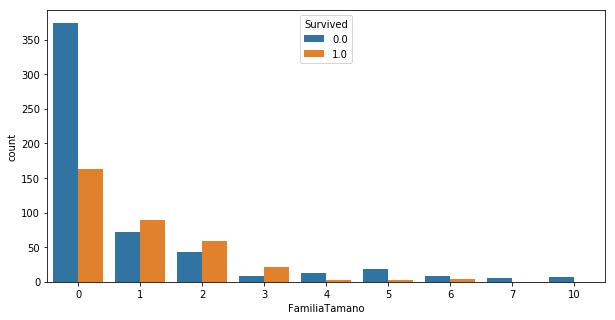

In [90]:
data['FamiliaTamano'] = data['SibSp'] + data['Parch']

plt.figure(figsize=(10,5))
sns.countplot(x='FamiliaTamano', hue='Survived', data=data)

data['FamiliaTamano'].value_counts()

### Age

In [57]:
data[].groupby('Name_encoding')['Age'].median()

Name_encoding
Master     4.0
Miss      22.0
Mr        30.0
Mrs       35.5
Name: Age, dtype: float64

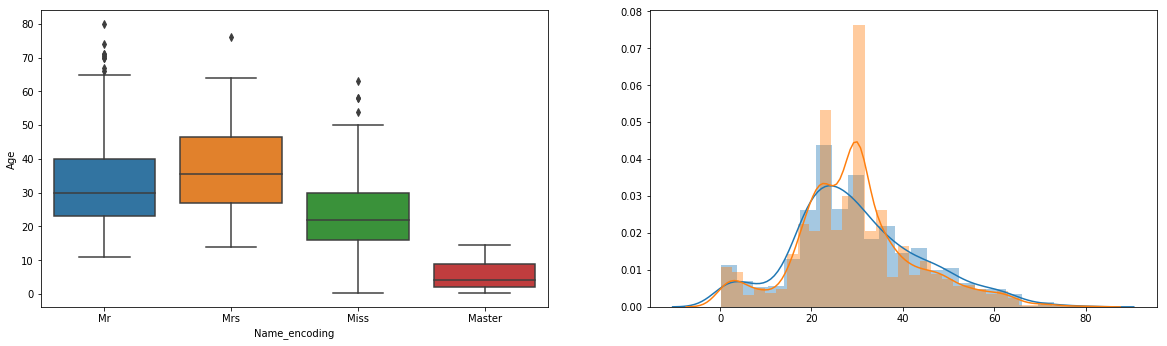

In [92]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.boxplot(x="Name_encoding", y="Age", data=data)

plt.subplot(2,2,2)
sns.distplot(data[['Age']].dropna())
data['Age'] = data.groupby('Name_encoding')['Age'].apply(lambda x: x.fillna(x.median()))
sns.distplot(data[['Age']])


